Sources used
* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
* https://datascience.stackexchange.com/questions/65979/what-is-the-correct-way-to-call-keras-flow-from-directory-method
* https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
* https://github.com/keras-team/keras/issues/5862#issuecomment-647559571
* https://keras.io/api/preprocessing/image/
* https://stackoverflow.com/questions/57092637/how-to-fit-keras-imagedatagenerator-for-large-data-sets-using-batches

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

You should consider upgrading via the '/home/tkashif/.conda/envs/ti-feeds-bert/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/tkashif/.conda/envs/ti-feeds-bert/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/tkashif/.conda/envs/ti-feeds-bert/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import time
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [3]:
start = time.time()

In [4]:
# define constants
ORIGINAL_PARENT_DIR = './FRUIT-16K' # enter path to original dataset
PREPROCESSED_PARENT_DIR = './FRUIT-16K-PREPROCESSED' # enter path to folder where you want the preprocessed data to go (code will create it)

CLASSES = []
for directory in os.listdir(ORIGINAL_PARENT_DIR):
    path = os.path.join(ORIGINAL_PARENT_DIR, directory)
    if os.path.isdir(path) and not directory.startswith('.'):
        CLASSES.append(directory)
print(CLASSES)

# define hyper-parameters
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
SEED = 10
TEST_SIZE = 0.2

['F_Tomato', 'S_Strawberry', 'F_Mango', 'F_Orange', 'S_Banana', 'F_Tamarillo', 'S_Orange', 'S_Tomato', 'S_Lemon', 'S_Tamarillo', 'S_Lulo', 'F_Lemon', 'F_Lulo', 'S_Mango', 'F_Strawberry', 'F_Banana']


In [5]:
def read_image(path):
    img = load_img(path, target_size = (IMAGE_HEIGHT, IMAGE_WIDTH))
    img_arr = img_to_array(img)
    return img_arr

def get_images_df(path):
    # walk through the path and create a dataframe
    # that has one column for the path to the image
    # and the other with the class name
    images_data = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if not file.startswith('.'):
                # add to dict [ image | class_name ]
                class_name = root.split(os.sep)[-1]
                image_path = os.path.join(root, file)
                images_data.append({
                    'image_path': image_path,
                    'class': class_name
                })
    df = pd.DataFrame(images_data)
    
    return df

def create_train_test_data(x_train, x_test, y_train, y_test, classes, save_path): 
    # create the train and test folders
    train_path = os.path.join(save_path, 'train')
    test_path = os.path.join(save_path, 'test')
    os.mkdir(train_path)
    os.mkdir(test_path)
        
    # for each class, make a subfolder
    for class_name in classes:
        os.mkdir(os.path.join(train_path, class_name))
        os.mkdir(os.path.join(test_path, class_name))
    
    # transfer files from dataframe image path to the appropriate
    # subfolder in save_path (sub folders based on class name)
    # also create x_train_final and x_test_final which will
    # store pixels of image
   # x_train_final = []
   # x_test_final = []
    for x_val, y_val in zip(x_train, y_train):
        new_path = os.path.join(train_path, y_val)
        shutil.copy(x_val, new_path)
       # filename = x_val.split(os.sep)[-1]
       # img_arr = read_image(os.path.join(new_path, filename))
       # x_train_final.append(img_arr)
    for x_val, y_val in zip(x_test, y_test):
        new_path = os.path.join(test_path, y_val)
        shutil.copy(x_val, new_path)
       # filename = x_val.split(os.sep)[-1]
       # img_arr = read_image(os.path.join(new_path, filename))
       # x_test_final.append(img_arr)
    
    #return np.asarray(x_train_final), np.asarray(x_test_final), y_train, y_test
        
def transfer_data(original_dir, new_dir, classes, test_size):
    # get the images as a dataframe
    # this dataframe has two columns, one with
    # the path to the image in original_dir and one with
    # the class name
    original_df = get_images_df(original_dir)
    
    # split the df into train and test
    x, y = original_df['image_path'], original_df['class']
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 30, test_size = test_size)
    
    # create the new_dir folder
    if os.path.exists(new_dir):
        shutil.rmtree(new_dir)
    os.mkdir(new_dir)
    
    # transfer all the data from original_df to new_dir
    # with the appropriate formatting and get back the
    # split with the x arrays having the pixels associated
    # with the images and the y arrays having the label
    # x_train, x_test, y_train, y_test = create_train_test_data(x_train, x_test, y_train, y_test, classes, save_path = new_dir)
    create_train_test_data(x_train, x_test, y_train, y_test, classes, save_path = new_dir)
   # return x_train, x_test, y_train, y_test

In [6]:
transfer_data(ORIGINAL_PARENT_DIR, PREPROCESSED_PARENT_DIR, classes = CLASSES, test_size = TEST_SIZE)
# x_train, x_test, y_train, y_test = transfer_data(ORIGINAL_PARENT_DIR, PREPROCESSED_PARENT_DIR, classes = CLASSES, test_size = TEST_SIZE)

In [7]:
# augment and preprocess the training data
train_image_data_generator = ImageDataGenerator(rescale = 1./255, rotation_range=30,
                                          zoom_range=0.15, width_shift_range=0.2,
                                          height_shift_range=0.2, shear_range=0.15,
                                          horizontal_flip=True, fill_mode="nearest")
print("done with train image generator")

# fit the train_image_data_generator to the train set
# only run this line of code if featurewise_center or featurewise_std_normalization or zca_whitening set to True
# train_image_data_generator.fit(x_train)
print("done with fit")

# do NOT augment the testing data
test_image_data_generator = ImageDataGenerator(rescale = 1./255)


# create the training generator and the testing generator from their respective folders
train_generator = train_image_data_generator.flow_from_directory(os.path.join(PREPROCESSED_PARENT_DIR, 'train'), 
                                                                 target_size = (IMAGE_HEIGHT, IMAGE_WIDTH), 
                                                                 classes = CLASSES, batch_size = BATCH_SIZE, 
                                                                 shuffle = True, seed = SEED)

#print(PREPROCESSED_PARENT_DIR)


test_generator = test_image_data_generator.flow_from_directory(os.path.join(PREPROCESSED_PARENT_DIR, 'test'), 
                                                               target_size = (IMAGE_HEIGHT, IMAGE_WIDTH), 
                                                               classes = CLASSES, batch_size = BATCH_SIZE, 
                                                               shuffle = True, seed = SEED)

print("done with flow")

done with train image generator
done with fit
Found 12800 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.
done with flow


In [8]:
end = time.time()

In [9]:
print(end - start)

3.4876391887664795


A few potentially useful links/notes for the ML team
* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator (check out the Example of using `.flow_from_directory(directory)` section) for how (I think) you can use the fit function with generators)
* You can access the mapping from class to indices through `train_generator.class_indices` or `train_generator.class_indices`
* https://stackoverflow.com/questions/61864244/how-to-avoid-augmenting-data-in-validation-split-of-keras-imagedatagenerator
* https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
* https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

In [10]:
# verify that the class index mapping are the same (should always be the case)
print(test_generator.class_indices == train_generator.class_indices)
print(train_generator.class_indices)
print(len(train_generator.class_indices))

True
{'F_Tomato': 0, 'S_Strawberry': 1, 'F_Mango': 2, 'F_Orange': 3, 'S_Banana': 4, 'F_Tamarillo': 5, 'S_Orange': 6, 'S_Tomato': 7, 'S_Lemon': 8, 'S_Tamarillo': 9, 'S_Lulo': 10, 'F_Lemon': 11, 'F_Lulo': 12, 'S_Mango': 13, 'F_Strawberry': 14, 'F_Banana': 15}
16


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  ...
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]]

 [[0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  ...
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]]

 [[0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  [0.5176471  0.59607846 0.54901963]
  ...
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]
  [0.654902   0.73333335 0.6862745 ]]

 ...

 [[0.29411766 0.34117648 0.24705884]
  [0.29411766 0.34117648 0.24705884]
  [0.29411766 0.34117648 0.24705884]
  ...
  [0.14901961 0.13725491 0.11764707]
  [0.14509805 0.1254902  0.10980393]
  [0.14901961 0.12941177 0.1137255 ]]

 [[0.30588236 0.3529412 

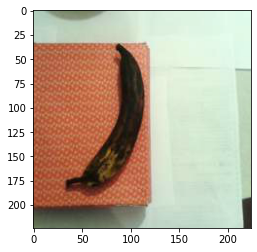

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[[0.5529412  0.6        0.6       ]
  [0.54901963 0.59607846 0.59607846]
  [0.54901963 0.59607846 0.59607846]
  ...
  [0.6862745  0.7411765  0.7411765 ]
  [0.68235296 0.7372549  0.7372549 ]
  [0.6784314  0.73333335 0.73333335]]

 [[0.5529412  0.6        0.6       ]
  [0.5529412  0.6        0.6       ]
  [0.54901963 0.59607846 0.59607846]
  ...
  [0.6862745  0.7411765  0.7411765 ]
  [0.68235296 0.7372549  0.7372549 ]
  [0.6784314  0.73333335 0.73333335]]

 [[0.5529412  0.6        0.6       ]
  [0.5529412  0.6        0.6       ]
  [0.54901963 0.59607846 0.59607846]
  ...
  [0.6862745  0.7411765  0.7411765 ]
  [0.68235296 0.7372549  0.7372549 ]
  [0.6784314  0.73333335 0.73333335]]

 ...

 [[0.3921569  0.40000004 0.38823533]
  [0.38431376 0.3921569  0.3803922 ]
  [0.37647063 0.38431376 0.37254903]
  ...
  [0.64705884 0.7019608  0.7019608 ]
  [0.64705884 0.7019608  0.7019608 ]
  [0.64705884 0.7019608  0.7019608 ]]

 [[0.42352945 0.43137258

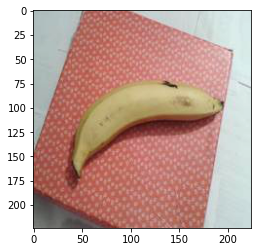

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.96470594 0.8588236  0.75294125]
  [0.8980393  0.79215693 0.6862745 ]
  [0.882353   0.77647066 0.67058825]
  ...
  [0.36078432 0.35686275 0.34901962]
  [0.36078432 0.35686275 0.34901962]
  [0.3647059  0.36078432 0.3529412 ]]

 [[0.94117653 0.8352942  0.7294118 ]
  [0.8980393  0.79215693 0.6862745 ]
  [0.8862746  0.7803922  0.6745098 ]
  ...
  [0.3647059  0.36078432 0.3529412 ]
  [0.3647059  0.36078432 0.3529412 ]
  [0.3647059  0.36078432 0.3529412 ]]

 [[0.9176471  0.8117648  0.7058824 ]
  [0.9058824  0.8000001  0.69411767]
  [0.8980393  0.79215693 0.6862745 ]
  ...
  [0.3647059  0.36078432 0.3529412 ]
  [0.36862746 0.3647059  0.35686275]
  [0.36862746 0.3647059  0.35686275]]

 ...

 [[0.9921569  1.         0.9960785 ]
  [0.9921569  1.         0.9960785 ]
  [0.9921569  1.         0.9960785 ]
  ...
  [0.36078432 0.36078432 0.3529412 ]
  [0.36078432 0.36078432 0.3529412 ]
  [0.36078432 0.36078432 0.3529412 ]]

 [[0.9843138  1.        

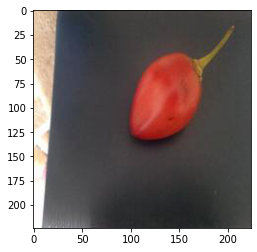

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.81568635 0.8745099  0.854902  ]
  [0.81568635 0.8745099  0.854902  ]
  [0.81568635 0.8745099  0.854902  ]
  ...
  [0.3019608  0.30980393 0.2901961 ]
  [0.29803923 0.30588236 0.28627452]
  [0.3019608  0.30980393 0.2901961 ]]

 [[0.8235295  0.882353   0.86274517]
  [0.8235295  0.882353   0.86274517]
  [0.8196079  0.87843144 0.8588236 ]
  ...
  [0.3019608  0.30980393 0.2901961 ]
  [0.30588236 0.3137255  0.29411766]
  [0.30980393 0.31764707 0.29803923]]

 [[0.82745105 0.8862746  0.86666673]
  [0.82745105 0.8862746  0.86666673]
  [0.8235295  0.882353   0.86274517]
  ...
  [0.30588236 0.3137255  0.29411766]
  [0.3137255  0.32156864 0.3019608 ]
  [0.32156864 0.32941177 0.30980393]]

 ...

 [[0.76470596 0.8235295  0.80392164]
  [0.76470596 0.8235295  0.80392164]
  [0.7372549  0.7960785  0.77647066]
  ...
  [0.21568629 0.19215688 0.20000002]
  [0.21960786 0.19607845 0.20392159]
  [0.22352943 0.20000002 0.20784315]]

 [[0.77647066 0.8352942 

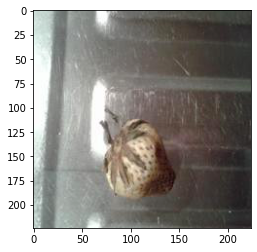

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[[0.79215693 0.65882355 0.5529412 ]
  [0.79215693 0.65882355 0.5529412 ]
  [0.79215693 0.654902   0.54509807]
  ...
  [0.07450981 0.07450981 0.04313726]
  [0.0627451  0.05882353 0.03921569]
  [0.02745098 0.02352941 0.00392157]]

 [[0.78823537 0.654902   0.54901963]
  [0.78823537 0.654902   0.54901963]
  [0.78823537 0.6509804  0.5411765 ]
  ...
  [0.04313726 0.04313726 0.01176471]
  [0.02352941 0.01960784 0.        ]
  [0.03921569 0.03529412 0.01568628]]

 [[0.7803922  0.64705884 0.5411765 ]
  [0.7803922  0.64705884 0.5411765 ]
  [0.7843138  0.64705884 0.5372549 ]
  ...
  [0.03529412 0.03529412 0.00392157]
  [0.03137255 0.03137255 0.        ]
  [0.05882353 0.05490196 0.03529412]]

 ...

 [[0.09411766 0.1137255  0.1254902 ]
  [0.09411766 0.1137255  0.1254902 ]
  [0.09803922 0.1137255  0.1254902 ]
  ...
  [0.0627451  0.07058824 0.05882353]
  [0.0627451  0.07058824 0.05882353]
  [0.0627451  0.07058824 0.05882353]]

 [[0.09411766 0.1137255 

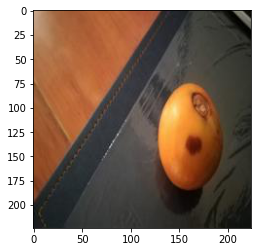

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.5568628  0.62352943 0.6       ]
  [0.54901963 0.6156863  0.5921569 ]
  [0.5411765  0.60784316 0.58431375]
  ...
  [0.60784316 0.6901961  0.6627451 ]
  [0.6117647  0.69411767 0.6666667 ]
  [0.6117647  0.69411767 0.6666667 ]]

 [[0.56078434 0.627451   0.6039216 ]
  [0.54901963 0.6156863  0.5921569 ]
  [0.5411765  0.60784316 0.58431375]
  ...
  [0.6039216  0.6862745  0.65882355]
  [0.6039216  0.6862745  0.65882355]
  [0.6039216  0.6862745  0.65882355]]

 [[0.5647059  0.6313726  0.60784316]
  [0.5529412  0.61960787 0.59607846]
  [0.54901963 0.6156863  0.5921569 ]
  ...
  [0.6        0.68235296 0.654902  ]
  [0.59607846 0.6784314  0.6509804 ]
  [0.59607846 0.6784314  0.6509804 ]]

 ...

 [[0.50980395 0.5764706  0.54509807]
  [0.50980395 0.5764706  0.54509807]
  [0.5137255  0.5803922  0.54901963]
  ...
  [0.14509805 0.12941177 0.1254902 ]
  [0.14509805 0.12941177 0.1254902 ]
  [0.14509805 0.12941177 0.1254902 ]]

 [[0.50980395 0.5764706 

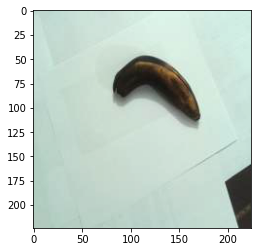

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[[0.54901963 0.37254903 0.25882354]
  [0.5686275  0.3921569  0.2784314 ]
  [0.5764706  0.3921569  0.28235295]
  ...
  [0.15686275 0.17254902 0.20784315]
  [0.20392159 0.23529413 0.2784314 ]
  [0.23529413 0.27450982 0.32156864]]

 [[0.5568628  0.3803922  0.26666668]
  [0.56078434 0.38431376 0.27058825]
  [0.54509807 0.36078432 0.2509804 ]
  ...
  [0.06666667 0.08235294 0.11764707]
  [0.09019608 0.12156864 0.16470589]
  [0.09803922 0.14509805 0.19215688]]

 [[0.5647059  0.38823533 0.27450982]
  [0.56078434 0.38431376 0.27058825]
  [0.5411765  0.35686275 0.24705884]
  ...
  [0.01960784 0.03529412 0.07058824]
  [0.01568628 0.04705883 0.09019608]
  [0.00784314 0.05490196 0.10196079]]

 ...

 [[0.59607846 0.40000004 0.2627451 ]
  [0.59607846 0.40000004 0.2627451 ]
  [0.6        0.4039216  0.26666668]
  ...
  [0.7137255  0.7372549  0.7372549 ]
  [0.64705884 0.67058825 0.67058825]
  [0.627451   0.6509804  0.6509804 ]]

 [[0.5882353  0.3921569 

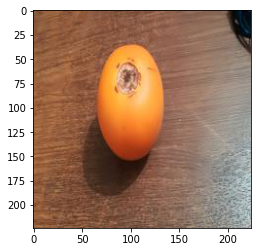

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.654902   0.7058824  0.6784314 ]
  [0.64705884 0.69803923 0.67058825]
  [0.6392157  0.6901961  0.6627451 ]
  ...
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]]

 [[0.6627451  0.7137255  0.6862745 ]
  [0.654902   0.7058824  0.6784314 ]
  [0.64705884 0.69803923 0.67058825]
  ...
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]]

 [[0.6666667  0.7176471  0.6901961 ]
  [0.6627451  0.7137255  0.6862745 ]
  [0.6509804  0.7019608  0.6745098 ]
  ...
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]
  [0.20784315 0.21176472 0.21960786]]

 ...

 [[0.79215693 0.8431373  0.81568635]
  [0.78823537 0.8470589  0.8196079 ]
  [0.78823537 0.8470589  0.8196079 ]
  ...
  [0.25490198 0.2627451  0.2509804 ]
  [0.25490198 0.2627451  0.2509804 ]
  [0.25490198 0.2627451  0.2509804 ]]

 [[0.8000001  0.85098046

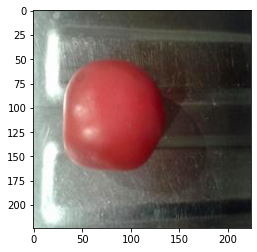

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  ...
  [0.9686275  0.9568628  0.8980393 ]
  [0.9686275  0.9568628  0.8980393 ]
  [0.96470594 0.95294124 0.8941177 ]]

 [[0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  ...
  [0.9686275  0.9568628  0.8980393 ]
  [0.9686275  0.9568628  0.8980393 ]
  [0.96470594 0.95294124 0.8941177 ]]

 [[0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  [0.8941177  0.882353   0.8235295 ]
  ...
  [0.9686275  0.9568628  0.8980393 ]
  [0.9686275  0.9568628  0.8980393 ]
  [0.96470594 0.95294124 0.8941177 ]]

 ...

 [[0.23137257 0.13725491 0.12941177]
  [0.23529413 0.14117648 0.13333334]
  [0.2392157  0.14117648 0.1254902 ]
  ...
  [0.16078432 0.16862746 0.227451  ]
  [0.16470589 0.17254902 0.23137257]
  [0.16862746 0.1764706  0.23529413]]

 [[0.227451   0.13333334

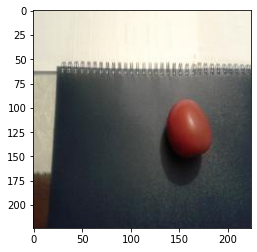

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[[0.27058825 0.20784315 0.20784315]
  [0.25882354 0.21176472 0.21176472]
  [0.25882354 0.24313727 0.2392157 ]
  ...
  [0.67058825 0.47450984 0.4784314 ]
  [0.63529414 0.43137258 0.43921572]
  [0.62352943 0.41960788 0.427451  ]]

 [[0.28235295 0.21960786 0.21960786]
  [0.2784314  0.23137257 0.23137257]
  [0.28627452 0.27058825 0.26666668]
  ...
  [0.654902   0.45882356 0.46274513]
  [0.6313726  0.427451   0.43529415]
  [0.6431373  0.43921572 0.44705886]]

 [[0.28627452 0.22352943 0.22352943]
  [0.28235295 0.23529413 0.23529413]
  [0.2901961  0.27450982 0.27058825]
  ...
  [0.6392157  0.4431373  0.44705886]
  [0.627451   0.42352945 0.43137258]
  [0.65882355 0.454902   0.46274513]]

 ...

 [[0.43137258 0.49411768 0.4431373 ]
  [0.4431373  0.4901961  0.4431373 ]
  [0.45098042 0.47450984 0.427451  ]
  ...
  [0.63529414 0.44705886 0.40784317]
  [0.5882353  0.4156863  0.3803922 ]
  [0.5568628  0.38823533 0.3529412 ]]

 [[0.45882356 0.5411765 

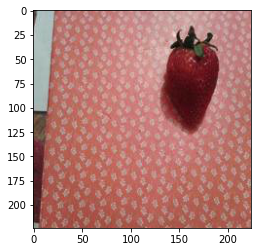

In [11]:
for _ in range(10):
    img, label = test_generator.next()
    print(label[0])
    print(img[0])
    plt.imshow(array_to_img(img[0]))
    plt.show()

(32, 224, 224, 3)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.16571428 0.19316526 0.23238094]
  [0.16470589 0.19215688 0.23137257]
  [0.1764706  0.20392159 0.24313727]
  ...
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]]

 [[0.16744974 0.19490072 0.2341164 ]
  [0.16470589 0.19215688 0.23137257]
  [0.17521435 0.20266533 0.24188103]
  ...
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]]

 [[0.16918522 0.1966362  0.23585188]
  [0.16470589 0.19215688 0.23137257]
  [0.17347887 0.20092985 0.24014555]
  ...
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]
  [0.3372549  0.3529412  0.3647059 ]]

 ...

 [[0.26666668 0.29411766 0.3254902 ]
  [0.26666668 0.29411766 0.3254902 ]
  [0.26666668 0.29411766 0.3254902 ]
  ...
  [0.31876758 0.33445385 0.34621856]
  [0.32156864 0.3372549  0.34901962]
  [0.32398823 0.3396745  0.35143924]]

 [[0.2

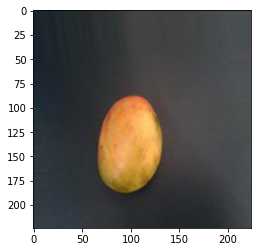

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[[0.07757425 0.11707564 0.1254902 ]
  [0.08339606 0.12062588 0.12846902]
  [0.08978932 0.12446183 0.13230495]
  ...
  [0.75429326 0.48372945 0.4523447 ]
  [0.7212076  0.42957976 0.40819165]
  [0.70980394 0.40224516 0.38907352]]

 [[0.06672884 0.10984537 0.1254902 ]
  [0.07056478 0.11240267 0.1254902 ]
  [0.07440073 0.11495997 0.1254902 ]
  ...
  [0.74045765 0.4623472  0.43473577]
  [0.71617645 0.41825974 0.3993872 ]
  [0.70980394 0.3997296  0.3903313 ]]

 [[0.04150577 0.09902068 0.11830138]
  [0.05045631 0.10285663 0.12085868]
  [0.05940686 0.10669257 0.12341597]
  ...
  [0.7266221  0.44096497 0.41712683]
  [0.71114534 0.40693972 0.39058274]
  [0.70980394 0.39721406 0.39158908]]

 ...

 [[0.65240306 0.4240537  0.32892832]
  [0.61727804 0.43002072 0.3107067 ]
  [0.5860383  0.40346736 0.2525783 ]
  ...
  [0.72228706 0.40856153 0.36542428]
  [0.7031073  0.3893818  0.34624454]
  [0.6839276  0.37020203 0.32706478]]

 [[0.6

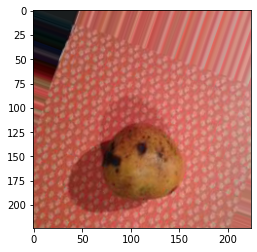

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[[0.61165994 0.30323306 0.21049246]
  [0.60498726 0.2991049  0.20890881]
  [0.6039216  0.29803923 0.20784315]
  ...
  [0.5882353  0.4039216  0.33333334]
  [0.5882353  0.4039216  0.33333334]
  [0.5861589  0.4018451  0.33333334]]

 [[0.61522114 0.3044201  0.2093054 ]
  [0.60617435 0.30029196 0.21009587]
  [0.6039216  0.29803923 0.20784315]
  ...
  [0.58614534 0.40183166 0.33333334]
  [0.58301896 0.39870524 0.33333334]
  [0.5803922  0.39607847 0.33333334]]

 [[0.6187823  0.30560717 0.20811835]
  [0.60736144 0.301479   0.21128292]
  [0.6039216  0.29803923 0.20784315]
  ...
  [0.5803922  0.39607847 0.33333334]
  [0.5803922  0.39607847 0.33333334]
  [0.5803922  0.39607847 0.33333334]]

 ...

 [[0.8890168  0.9642489  0.9171901 ]
  [0.87426245 0.96870995 0.9203165 ]
  [0.86019355 0.97339964 0.9234429 ]
  ...
  [0.5647059  0.2509804  0.21568629]
  [0.56284785 0.25283846 0.21568629]
  [0.56078434 0.25696662 0.21775092]]

 [[0.8

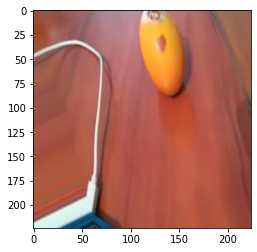

(32, 224, 224, 3)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  ...
  [0.24313727 0.2509804  0.2392157 ]
  [0.24313727 0.2509804  0.2392157 ]
  [0.24340333 0.25124648 0.23948176]]

 [[0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  ...
  [0.24313727 0.2509804  0.2392157 ]
  [0.24313727 0.2509804  0.2392157 ]
  [0.24468717 0.2525303  0.2407656 ]]

 [[0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  [0.96470594 1.         0.9843138 ]
  ...
  [0.24313727 0.2509804  0.2392157 ]
  [0.24313727 0.2509804  0.2392157 ]
  [0.24597102 0.25381413 0.24204946]]

 ...

 [[0.6555297  0.698667   0.6672944 ]
  [0.654902   0.69126344 0.67005455]
  [0.67707837 0.7123725  0.69276464]
  ...
  [0.22434233 0.24395017 0.2282639 ]
  [0.22657783 0.24618568 0.2304994 ]
  [0.22881334 0.24842118 0.2327349 ]]

 [[0.6

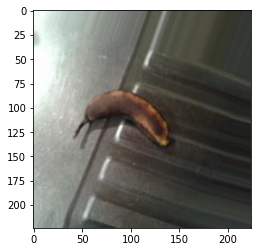

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[[0.15332715 0.12555975 0.08713513]
  [0.15321709 0.12534241 0.08718595]
  [0.14993283 0.12195089 0.0840626 ]
  ...
  [0.76961213 0.81667095 0.7774553 ]
  [0.76982665 0.8168855  0.7776698 ]
  [0.77004117 0.8171     0.7778843 ]]

 [[0.15294118 0.1254902  0.08627451]
  [0.15294118 0.1254902  0.08627451]
  [0.14961337 0.12216238 0.0829467 ]
  ...
  [0.7686275  0.81568635 0.77647066]
  [0.7686275  0.81568635 0.77647066]
  [0.7686275  0.81568635 0.77647066]]

 [[0.15294118 0.1254902  0.08627451]
  [0.15294118 0.1254902  0.08627451]
  [0.14955938 0.12210839 0.0828927 ]
  ...
  [0.78153527 0.831821   0.79260534]
  [0.78132075 0.83155286 0.7923372 ]
  [0.78110623 0.83128476 0.7920691 ]]

 ...

 [[0.6611884  0.33800337 0.2392157 ]
  [0.64532757 0.307207   0.22470105]
  [0.62545186 0.28427538 0.20928496]
  ...
  [0.75294125 0.6        0.53333336]
  [0.75294125 0.6        0.53333336]
  [0.75294125 0.6        0.53333336]]

 [[0.6

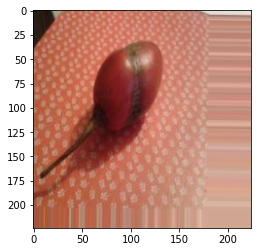

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[[0.81326765 0.20150293 0.1426794 ]
  [0.8169645  0.20519976 0.14637622]
  [0.8196079  0.20784315 0.14901961]
  ...
  [0.55825675 0.34396452 0.21821384]
  [0.5568628  0.34117648 0.21960786]
  [0.5568628  0.34117648 0.21960786]]

 [[0.8119612  0.20019649 0.14137296]
  [0.8156581  0.20389332 0.1450698 ]
  [0.8193549  0.20759013 0.1487666 ]
  ...
  [0.5568628  0.34117648 0.21960786]
  [0.5568628  0.34117648 0.21960786]
  [0.5559408  0.34209844 0.21960786]]

 [[0.80732495 0.19889006 0.14117648]
  [0.8143516  0.20258687 0.14376333]
  [0.8180484  0.2062837  0.14746016]
  ...
  [0.5553463  0.34269297 0.21960786]
  [0.5539355  0.34410372 0.21960786]
  [0.5525248  0.34468162 0.21919143]]

 ...

 [[0.7283297  0.20784315 0.11859354]
  [0.7227399  0.2105935  0.11764707]
  [0.7190431  0.21429032 0.11764707]
  ...
  [0.42352945 0.20000002 0.13333334]
  [0.42352945 0.20000002 0.13333334]
  [0.42352945 0.20000002 0.13333334]]

 [[0.7

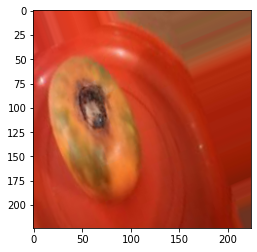

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.65663517 0.70761555 0.67232144]
  [0.6491322  0.7001126  0.66481847]
  [0.63935363 0.690334   0.6550399 ]
  ...
  [0.6067878  0.7131978  0.6763207 ]
  [0.60471654 0.7121622  0.6721782 ]
  [0.60264534 0.71112657 0.6680357 ]]

 [[0.65878254 0.70976293 0.6744688 ]
  [0.65189564 0.70287603 0.6675819 ]
  [0.642023   0.6930034  0.6577093 ]
  ...
  [0.5997929  0.7095968  0.662538  ]
  [0.59875727 0.7085612  0.66150236]
  [0.59772164 0.70752555 0.66046673]]

 [[0.6577704  0.70559126 0.6713503 ]
  [0.6540431  0.70502347 0.66972935]
  [0.6452441  0.6962245  0.6609304 ]
  ...
  [0.5961918  0.70599574 0.6589369 ]
  [0.5970008  0.7049601  0.65697896]
  [0.5980364  0.7039245  0.65490776]]

 ...

 [[0.63149273 0.33509985 0.31157044]
  [0.6242434  0.32992175 0.30639234]
  [0.61419314 0.32847816 0.29934698]
  ...
  [0.6327471  0.4006873  0.37440875]
  [0.63412875 0.4055123  0.39576358]
  [0.63757217 0.42378908 0.42670146]]

 [[0.5

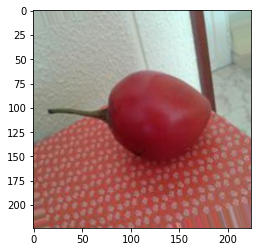

(32, 224, 224, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  ...
  [0.6313726  0.6509804  0.627451  ]
  [0.6313726  0.6509804  0.627451  ]
  [0.6313726  0.6509804  0.627451  ]]

 [[0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  ...
  [0.6295811  0.64918894 0.62386805]
  [0.628696   0.64830387 0.6220979 ]
  [0.62781096 0.6474188  0.6203278 ]]

 [[0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  [0.6509804  0.70980394 0.7372549 ]
  ...
  [0.627451   0.64705884 0.61960787]
  [0.627451   0.64705884 0.61960787]
  [0.627451   0.64705884 0.61960787]]

 ...

 [[0.53718865 0.6077769  0.6077769 ]
  [0.5363036  0.6068918  0.6068918 ]
  [0.53541845 0.6060067  0.6060067 ]
  ...
  [0.5073374  0.55047464 0.53478837]
  [0.51535535 0.5584926  0.5428063 ]
  [0.5205102  0.56364745 0.5479612 ]]

 [[0.5

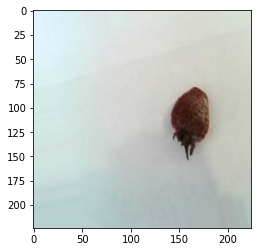

(32, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[[0.04594969 0.04594969 0.03810656]
  [0.05134276 0.05134276 0.04349962]
  [0.05371737 0.05371737 0.04587423]
  ...
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]]

 [[0.04882514 0.04882514 0.040982  ]
  [0.05230867 0.05230867 0.04446553]
  [0.04996207 0.04996207 0.04211894]
  ...
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]]

 [[0.05353099 0.05353099 0.04568785]
  [0.05763832 0.05763832 0.04979518]
  [0.05701724 0.05701724 0.0491741 ]
  ...
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]
  [0.01176471 0.01960784 0.01568628]]

 ...

 [[0.3535533  0.36923957 0.37316114]
  [0.33900967 0.35469595 0.3586175 ]
  [0.30227175 0.32007426 0.32822835]
  ...
  [0.84279543 0.846717   0.82710916]
  [0.84941983 0.8509251  0.83228374]
  [0.85792446 0.8561587  0.83882576]]

 [[0.3

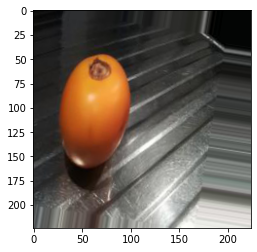

(32, 224, 224, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.53587794 0.36243507 0.2808391 ]
  [0.5139814  0.35305086 0.27458292]
  [0.57864755 0.41786325 0.33943188]
  ...
  [0.650894   0.40340403 0.3098191 ]
  [0.67975396 0.43661672 0.34642065]
  [0.7095201  0.46550092 0.37558356]]

 [[0.5656958  0.38462785 0.30380735]
  [0.5246436  0.35762036 0.27762926]
  [0.546661   0.38587666 0.3074453 ]
  ...
  [0.6626198  0.40880436 0.32201073]
  [0.71061265 0.4685033  0.37756777]
  [0.74238837 0.50476015 0.41180956]]

 [[0.6144373  0.4242303  0.3464561 ]
  [0.53530574 0.3621899  0.2806756 ]
  [0.51467437 0.3538901  0.2754587 ]
  ...
  [0.6679645  0.4059788  0.32171115]
  [0.70525575 0.4613308  0.37074813]
  [0.74352235 0.50757194 0.41542324]]

 ...

 [[0.570356   0.29861543 0.18431373]
  [0.5745846  0.30002493 0.18431373]
  [0.5788132  0.30143446 0.18431373]
  ...
  [0.64063734 0.28377458 0.21318635]
  [0.6494543  0.27211437 0.20323257]
  [0.6718745  0.2697788  0.20219918]]

 [[0.5

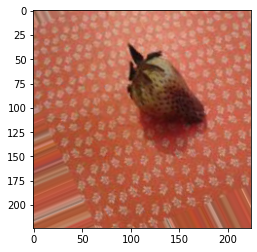

In [12]:
for _ in range(10):
    img, label = train_generator.next()
    print(img.shape)
    print(label[0])
    print(img[0])
    plt.imshow(array_to_img(img[0]))
    plt.show()

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

print(len(train_generator.class_indices))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.fit(train_generator,
          batch_size=32,
          epochs=750,
          verbose=1,
          validation_data=test_generator,
          callbacks=[callback])

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import numpy as np

img, label = train_generator.next()
print(label[0])
print(img[0].shape)

singleImage = img[0]
singleImage = np.expand_dims(singleImage, axis = 0) # Note that this is done because the model is trained on batches of images. 
print(singleImage.shape) # But when we are passing only 1 image our tensor size is only (224,224,3).
test = model.predict(singleImage) # What we really want to pass in is (BATCH_SIZE,224,224,3), in this case the batch is 1. 

test.shape
print(test)

np.argmax(test) # This is done to get the array index of the highest probability output since we are using softmax. 

plt.imshow(img[0])
plt.show()

print("Prediction: ",(CLASSES[np.argmax(test)]))